In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
%matplotlib inline


In [2]:
takehome_users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


c:\Users\keyur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


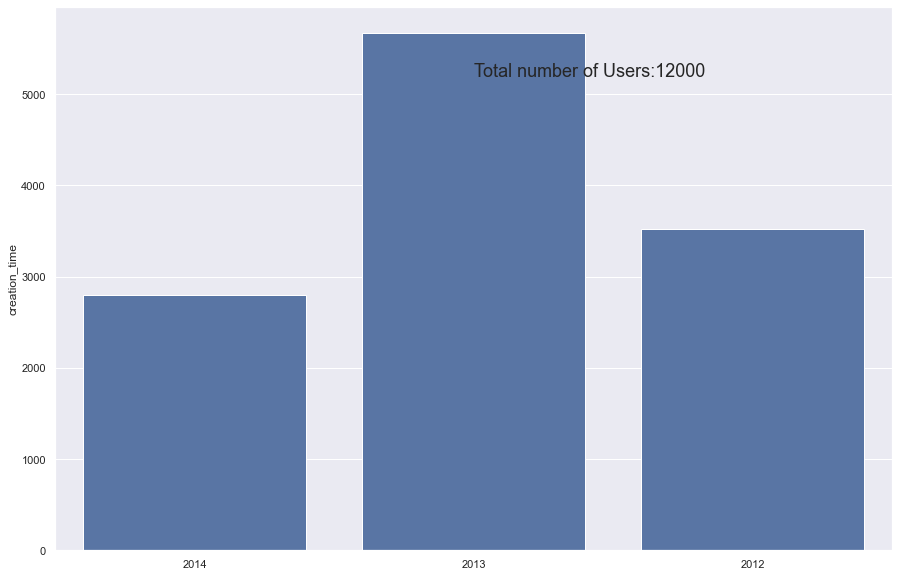

In [4]:
years=takehome_users.creation_time.astype(str).str.slice(0,4)
x = years.unique()
y = years.groupby(years).count()
plt.figure(figsize=[15,10])
sns.set()
sns.barplot(x,y,color='b')
plt.text(x=1., y=5200, s= 'Total number of Users:{}'.format(takehome_users.shape[0]),fontsize=18)

plt.savefig('Total number of Users.png')

In [5]:
years=takehome_users.creation_time.astype(str).str.slice(0,4)
y = takehome_users.creation_source.groupby([takehome_users.creation_source,years]).count()
df =pd.DataFrame(y).unstack(level=0)
df

creation_source                                      \
creation_source    GUEST_INVITE ORG_INVITE PERSONAL_PROJECTS SIGNUP   
creation_time                                                         
2012                        540        948               519    470   
2013                        981       2021              1033    997   
2014                        642       1285               559    620   

                                    
creation_source SIGNUP_GOOGLE_AUTH  
creation_time                       
2012                           320  
2013                           644  
2014                           421

In [6]:
takehome_users.corr(method ='pearson')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.018699
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.011874
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.004699
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003687
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.057780
invited_by_user_id,0.018699,0.011874,0.004699,0.003687,-0.057780,1.000000


In [7]:
takehome_users['last_session_creation_time']=takehome_users.last_session_creation_time[takehome_users.last_session_creation_time.notnull()].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [8]:
takehome_users.last_session_creation_time.unique()

array(['2014-04-22T09:23:30.000000000', '2014-03-31T09:15:04.000000000',
       '2013-03-20T04:44:52.000000000', ...,
       '2014-04-27T18:15:16.000000000', '2012-06-02T17:25:59.000000000',
       '2014-01-26T14:27:12.000000000'], dtype='datetime64[ns]')

In [9]:
takehome_users['creation_time']= pd.to_datetime(takehome_users.creation_time)
takehome_users['creation_time'][0]
takehome_users.last_session_creation_time[0]

Timestamp('2014-04-22 09:23:30')

In [10]:
takehome_users['inactivity']= (takehome_users.last_session_creation_time[takehome_users.last_session_creation_time.notnull()]-takehome_users.creation_time[takehome_users.creation_time.notnull()])

In [11]:
takehome_users = takehome_users.sort_values(by='inactivity')
takehome_users.head() 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 09:23:30,1,0,11,10803.0,0 days 05:30:00
6092,6093,2013-04-17 12:47:43,Doherty Lucy,ujkwhtat@slwef.com,ORG_INVITE,2013-04-17 18:17:43,0,0,90,9862.0,0 days 05:30:00
6093,6094,2013-04-18 07:01:13,Curtis Nathan,NathanCurtis@hotmail.com,SIGNUP,2013-04-18 12:31:13,0,0,148,NaN,0 days 05:30:00
6096,6097,2014-04-16 09:27:10,McLean Tegan,TeganMcLean@yahoo.com,ORG_INVITE,2014-04-16 14:57:10,0,0,351,6869.0,0 days 05:30:00
6104,6105,2012-12-20 00:23:51,Palmer Billy,BillyPalmer@gmail.com,ORG_INVITE,2012-12-20 05:53:51,0,0,368,10286.0,0 days 05:30:00


([<matplotlib.patches.Wedge at 0x1113d23f5e0>,
 [Text(-0.8130125214118383, 0.7409525221143155, 'Inactive'),
  Text(0.8869227506310959, -0.8083118423065265, 'Active Users')],
 [Text(-0.44346137531554813, 0.40415592115326293, '26.5%'),
  Text(0.517371604534806, -0.47151524134547373, '73.5%')])

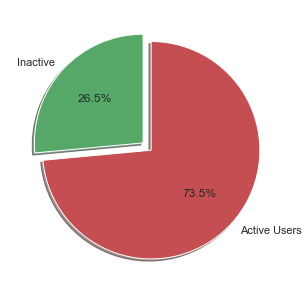

In [12]:
x=takehome_users.last_session_creation_time[takehome_users.last_session_creation_time.isnull()].shape[0]
y=takehome_users.shape[0]-x
plt.figure(figsize=[5,5])
plt.pie([x/takehome_users.shape[0],y/takehome_users.shape[0]], explode=(0,0.1), autopct='%1.1f%%',colors='grays',
            shadow=True, startangle=90, labels= ('Inactive', 'Active Users'))

In [13]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11993
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  8823 non-null   datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  int64          
 7   enabled_for_marketing_drip  12000 non-null  int64          
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          6417 non-null   float64        
 10  inactivity                  8823 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4

In [14]:
takehome_user_engagement=pd.read_csv('takehome_user_engagement.csv')
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
takehome_user_engagement['time_stamp']=pd.to_datetime(takehome_user_engagement['time_stamp'])

Defining Adopted Users

In [16]:
takehome_user_engagement['visits_7_days'] = takehome_user_engagement.groupby('user_id', as_index=False, group_keys=False).apply(lambda x:x.rolling('7D',on='time_stamp')['user_id'].count())
takehome_user_engagement.head(5)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [17]:
takehome_user_engagement.drop_duplicates('user_id', keep = 'first')
takehome_user_engagement.shape


(207917, 4)

In [18]:
adopted_users = takehome_user_engagement[takehome_user_engagement['visits_7_days']>=3]

adopted_users = adopted_users.drop_duplicates('user_id', keep = 'first')

len(adopted_users)

1602

In [19]:
aadopted_users_list = adopted_users.user_id.tolist()

Cleaning User Data

In [20]:
users_1=takehome_users[takehome_users.object_id.isin(aadopted_users_list)]
len(users_1)

1602

In [21]:
users_1.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
3058,3059,2013-12-27 07:33:08,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,2013-12-31 13:03:08,0,0,171,2139.0,4 days 05:30:00
4092,4093,2013-11-19 07:19:38,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,2013-11-24 12:49:38,0,0,318,4143.0,5 days 05:30:00


In [22]:
takehome_user_engagement.drop(['visited'],axis=1, inplace=True)

In [23]:
takehome_user_engagement.head(2)

,time_stamp,user_id,visits_7_days
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0


In [24]:
users_1.shape

(1602, 11)

Merging User Data and Engagement Data

In [25]:
users_f = users_1.merge(takehome_user_engagement, how = 'left', left_on = 'object_id', right_on = 'user_id')


In [26]:
users_f['last_session_creation_time'] = users_f.last_session_creation_time[users_f['last_session_creation_time'].notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['time_stamp'] = users_f.time_stamp[users_f.time_stamp.notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['creation_time'] = users_f.creation_time[users_f.creation_time.notnull()].apply(lambda x: datetime.datetime.timestamp(x))

In [27]:
users_f = users_f.fillna(0)

TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

In [28]:
users_f.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity,time_stamp,user_id,visits_7_days
0,3059,1.388110e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days 05:30:00,1.388196e+09,3059,1.0
1,3059,1.388110e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days 05:30:00,1.388283e+09,3059,2.0
2,3059,1.388110e+09,Leckie Austin,AustinLeckie@gmail.com,ORG_INVITE,1.388475e+09,0,0,171,2139.0,4 days 05:30:00,1.388455e+09,3059,3.0
3,4093,1.384826e+09,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,5 days 05:30:00,1.384826e+09,4093,1.0
4,4093,1.384826e+09,Craig Jude,JudeCraig@gmail.com,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,5 days 05:30:00,1.385171e+09,4093,2.0


In [29]:
users_f.drop(['name','email','inactivity'],axis=1, inplace=True)
users_f.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days
0,3059,1.388110e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388196e+09,3059,1.0
1,3059,1.388110e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388283e+09,3059,2.0
2,3059,1.388110e+09,ORG_INVITE,1.388475e+09,0,0,171,2139.0,1.388455e+09,3059,3.0
3,4093,1.384826e+09,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,1.384826e+09,4093,1.0
4,4093,1.384826e+09,GUEST_INVITE,1.385278e+09,0,0,318,4143.0,1.385171e+09,4093,2.0


In [30]:
users_f['is_adopted']=users_f.visits_7_days
users_f['is_adopted'][users_f['is_adopted']>=3].count()

160522

In [31]:
users_f['is_adopted'][users_f['is_adopted']<3]=0
users_f['is_adopted'][users_f['is_adopted']>=3]=1
users_f['is_adopted'][users_f['is_adopted']==1].count()

C:\Users\keyur\AppData\Local\Temp\ipykernel_17060\3786778338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_f['is_adopted'][users_f['is_adopted']<3]=0
C:\Users\keyur\AppData\Local\Temp\ipykernel_17060\3786778338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_f['is_adopted'][users_f['is_adopted']>=3]=1


160522